<a href="https://colab.research.google.com/github/vineeth2707/Image-Classifiers-Using-Neural-Networks-and-the-MNIST-and-Fashion-MNIST-Datasets/blob/main/P1_starter_CAP6619_Summer2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Image Classifiers Using Neural Networks and the MNIST and Fashion MNIST Datasets

**Include your name here:** (Saivineeth Suram)

**Include 'shared link' to 'your' final version of this NB here:** (https://colab.research.google.com/drive/1wq5TezX0JFYJi0iANmyhOgM5_CI3nHzH?authuser=1#scrollTo=Whf_8TEO-6qX)

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

## PART 1 - *MNIST classifier using MLP*




### Import Needed Resources / Libraries

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

### Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Examine Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

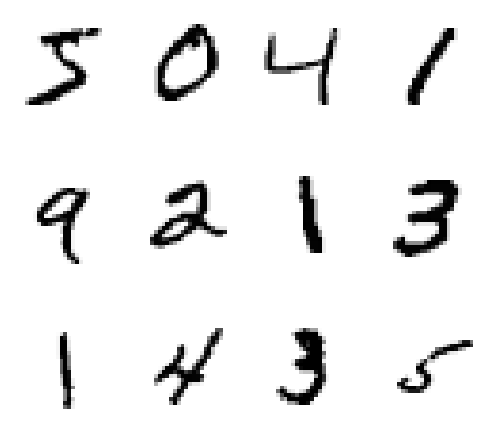

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

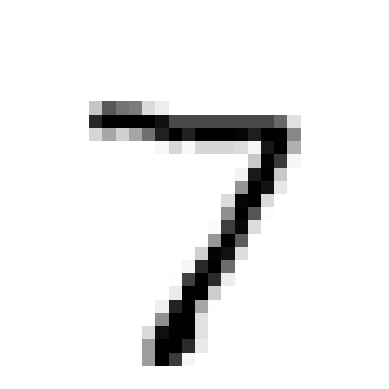

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Configure model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

In [ ]:
model.compile(
    loss='mean_squared_error',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

### Train!

In [ ]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 8s 7ms/step - loss: 0.0932 - accuracy: 0.1015 - val_loss: 0.0921 - val_accuracy: 0.1180
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.1432 - val_loss: 0.0909 - val_accuracy: 0.1635
Epoch 3/200
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - accuracy: 0.1768 - val_loss: 0.0901 - val_accuracy: 0.1879
Epoch 4/200
469/469 [==============================] - 3s 7ms/step - loss: 0.0899 - accuracy: 0.1952 - val_loss: 0.0896 - val_accuracy: 0.2030
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0894 - accuracy: 0.2103 - val_loss: 0.0891 - val_accuracy: 0.2160
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.2245 - val_loss: 0.0888 - val_accuracy: 0.2337
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.2444 - val_loss: 0.0884 - val_accuracy: 0.2528

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


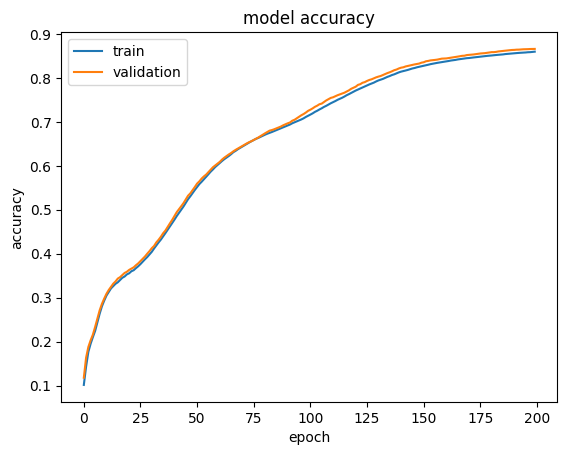

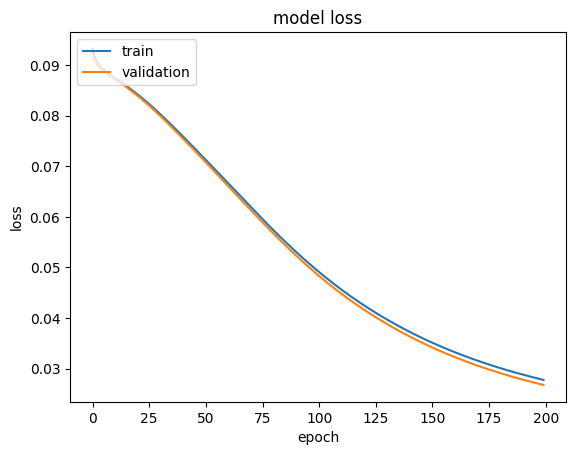

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0268 - accuracy: 0.8659


[0.026796728372573853, 0.8658999800682068]

## **PART 1** - *Your Turn*

### **Part 1 - Tasks:**  *(40 pts)*
1. Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides. See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

2. Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

#### 1.a. Confusion Matrix *(10 pts)*

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 1.1628 - accuracy: 0.7232 - val_loss: 0.6393 - val_accuracy: 0.8528
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5482 - accuracy: 0.8655 - val_loss: 0.4513 - val_accuracy: 0.8876
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4358 - accuracy: 0.8861 - val_loss: 0.3874 - val_accuracy: 0.8992
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3870 - accuracy: 0.8957 - val_loss: 0.3524 - val_accuracy: 0.9049
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3576 - accuracy: 0.9026 - val_loss: 0.3304 - val_accuracy: 0.9100
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.9071 - val_loss: 0.3143 - val_accuracy: 0.9131
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3218 - accuracy: 0.9106 - val_loss: 0.3019 - val_accuracy: 0.9160
Epoch 

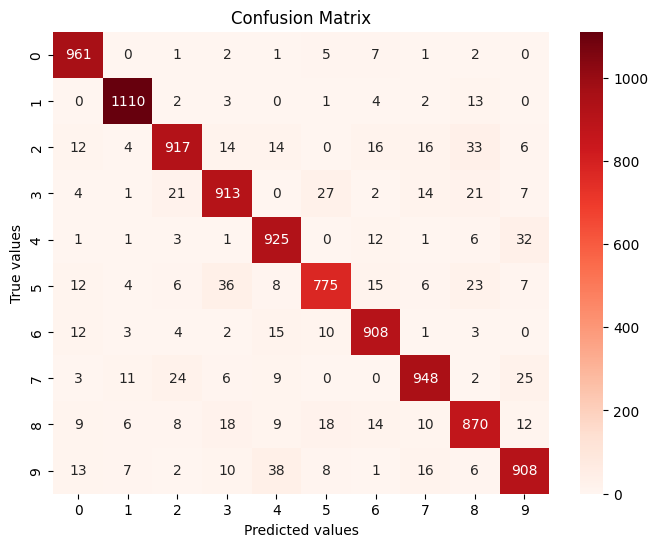

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_valid, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = [str(i) for i in range(num_classes)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

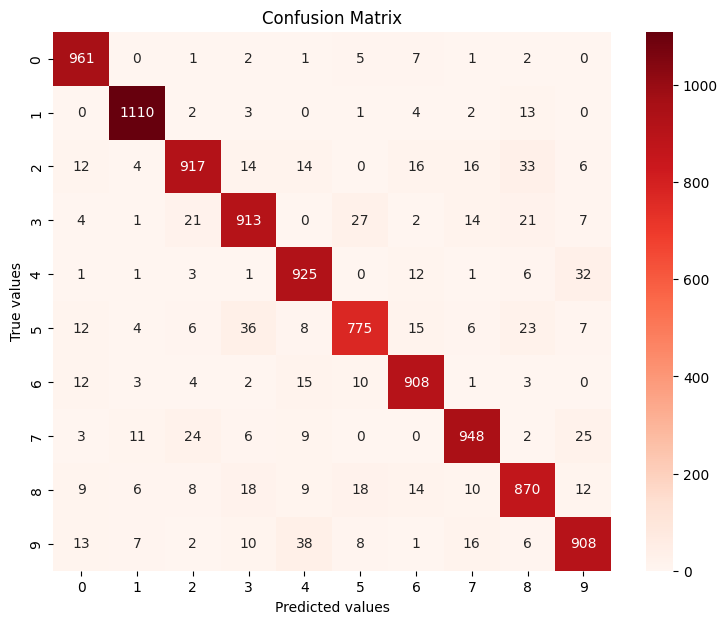

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = [str(i) for i in range(num_classes)]

plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


#### 1.b. Comment on the insights confusion matrix provides *(10 pts)*

This matrix shows how well the classifier performs. It reveals the accuracy by adding the true positives and dividing by the total cases. It measures the model's overall performance based on TP and TN values. The classifier effectively identifies every class. FP and FN characterize misclassifications in the confusion matrix. False positives occur when predicting the wrong positive class, while false negatives occur when predicting the wrong negative class. This data tells us which errors the classifier made and how well it performed for each class. It aids in comprehending accurate instructions and identifying areas for improvement. The calculated precision is recalled in the confusion matrix. Precision is TP divided by TP and FP, while recall is TP divided by the sum of TP and FN. These metrics show how well the classifier identifies ideal situations (precision) and captures all light cases. We can analyze the classifier through the confusion matrix. It identifies well-predicted and problematic classes, allowing for model adjustments like decision threshold tweaking, training data editing, or increased focus on high error rate classes. Insights from the confusion matrix must be considered with contrast metrics and area understanding for informed classifier upgrades.

#### 2.Display 10 cases where the classifier makes mistakes. *(20 pts)*

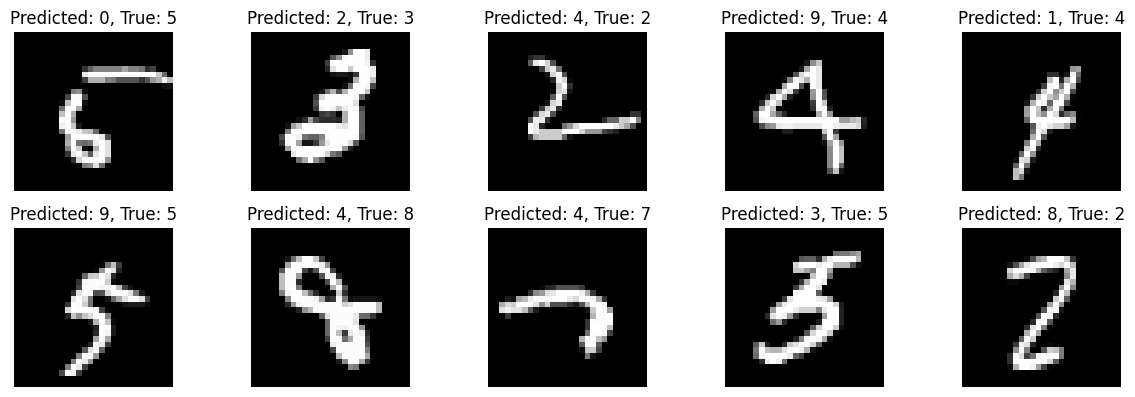

In [ ]:
misclassified_indices = np.where(y_pred_labels != y_true_labels)[0]

random_misclassified_indices = np.random.choice(misclassified_indices, size=10, replace=False)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_misclassified_indices):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_valid[index], cmap='gray')
    plt.title(f"Predicted: {y_pred_labels[index]}, True: {y_true_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## PART 2 - *Fashion MNIST*




### Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [ ]:
# Loading and Spliting Data in Test and Train
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


### Defining Classes

In [ ]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot']

### Examine Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_train[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

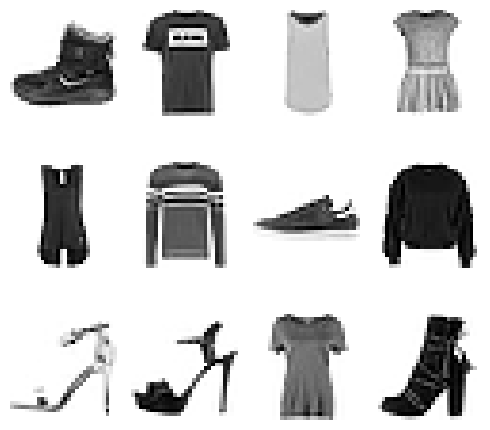

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

9

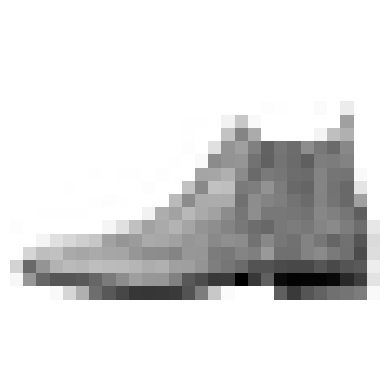

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## **PART 2** - *Your Turn*

### **Part 2 - Tasks:** *(60 pts)*
Build a NN solution identical to the one before: *(20 pts)*
> a. Plot learning curves *(10 pts)*

> b. Display the confusion matrix for your classifier *(10 pts)*

> c. Evaluate the model, identify accuracy, etc. *(10 pts)*

> d. Discuss why the results are not as good. *(10 pts)*





#### NN solution *(20 pts)*

Configure the Model *(10 pts)*

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2473 - accuracy: 0.6972 - val_loss: 0.6666 - val_accuracy: 0.8495
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5697 - accuracy: 0.8584 - val_loss: 0.4669 - val_accuracy: 0.8799
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4514 - accuracy: 0.8804 - val_loss: 0.3992 - val_accuracy: 0.8931
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8904 - val_loss: 0.3629 - val_accuracy: 0.9000
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3692 - accuracy: 0.8968 - val_loss: 0.3407 - val_accuracy: 0.9054
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3480 - accuracy: 0.9025 - val_loss: 0.3230 - val_accuracy: 0.9103
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.9062 - val_loss: 0.3102 - val_accuracy: 0.9132
Epoch 

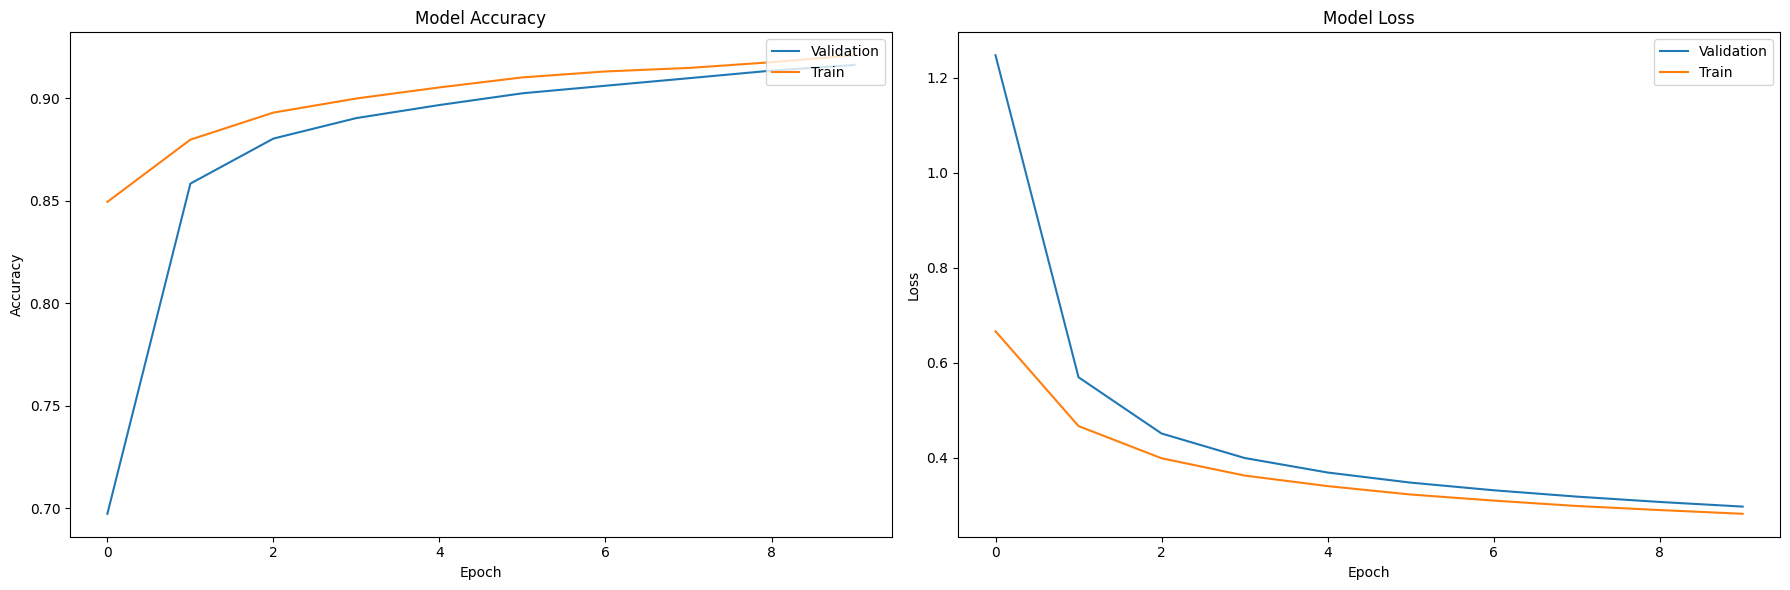

In [ ]:
# Your Configure the Model code here and in additional code cells as needed
# use same model and hyperparameters as was used for MNIST above
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plts

num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

plts.figure(figsize=(18, 6))

plts.subplot(1, 2, 1)
plts.plot(history.history['accuracy'])
plts.plot(history.history['val_accuracy'])
plts.title('Model Accuracy')
plts.xlabel('Epoch')
plts.ylabel('Accuracy')
plts.legend(['Validation', 'Train'], loc='upper right')

plts.subplot(1, 2, 2)
plts.plot(history.history['loss'])
plts.plot(history.history['val_loss'])
plts.title('Model Loss')
plts.xlabel('Epoch')
plts.ylabel('Loss')
plts.legend(['Validation', 'Train'], loc='upper right')

plts.tight_layout()
plts.show()


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

num_classes = 10
input_shape = (28, 28, 1)

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train the Model  *(10 pts)*

In [ ]:
# Your Train the Model code here and in additional code cells as needed
# same as was used in MNIST above
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1503 - accuracy: 0.7318 - val_loss: 0.6271 - val_accuracy: 0.8569
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5443 - accuracy: 0.8662 - val_loss: 0.4480 - val_accuracy: 0.8861
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4344 - accuracy: 0.8856 - val_loss: 0.3853 - val_accuracy: 0.8979
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3860 - accuracy: 0.8951 - val_loss: 0.3508 - val_accuracy: 0.9051
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.9025 - val_loss: 0.3282 - val_accuracy: 0.9097
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3362 - accuracy: 0.9067 - val_loss: 0.3129 - val_accuracy: 0.9147
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.9104 - val_loss: 0.3005 - val_accuracy: 0.9181
Epoch 

#### Plot learning curves *(10 pts)*

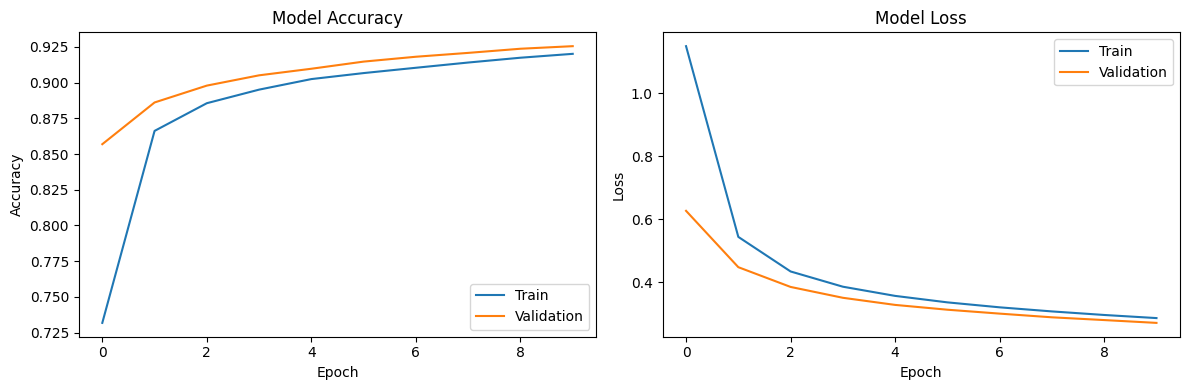

In [ ]:
# Your Plot learning curves code here and in additional code cells as needed

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

#### Display the confusion matrix for your classifier *(10 pts)*

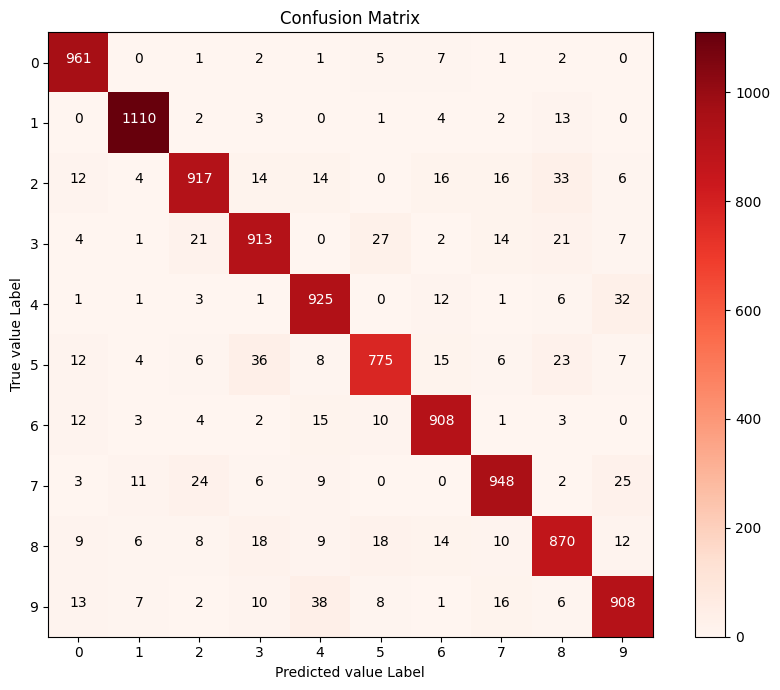

In [ ]:
# Your confusion matrix code here and in additional code cells as needed
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(9, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted value Label')
plt.ylabel('True value Label')
plt.tight_layout()

thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()



#### Evaluate the model, identify accuracy, etc. *(10 pts)*

In [ ]:
# Your Evaluate the model code here and in additional code cells as needed
loss, accuracy = model.evaluate(X_valid, y_valid, verbose=0)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.2710
Validation Accuracy: 0.9255


#### Discuss why the results are not as good.

If you had more time what would you do to improve the results? *(10 pts)*

The results could be more suitable as the Complex model architecture may capture data patterns. Adding layers, more gadgets, or superior architectures can boost performance. The training stats may require improvement for the mannequin to function better. With a larger dataset, the model will generalize better. Mannequin may have been overfitted and needs to generalize to new data. Regularization limits overfitting and enhances generalization with techniques like dropout or weight regularization. The model's hyperparameters may have needed to have been optimized correctly. Tuning hyperparameters with grid or random search improves results. More data preprocessing can affect model results. Appropriate scaling, handling of missing data, and quality feature engineering can improve results. If data has an imbalanced classification, the model struggles to predict minority classes due to fewer samples. Sampling techniques can address type imbalance. The chosen structure may not fit the dataset. Trying different models or architectures could lead to better results.
Machine learning can be enhanced with randomness in weight and data shuffling. Running the mannequin multiple times with the same hyperparameters should give slightly different outcomes. Iteratively testing and improving elements is crucial for better model performance. Analyze challenges and barriers to improving the model and data pipeline.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

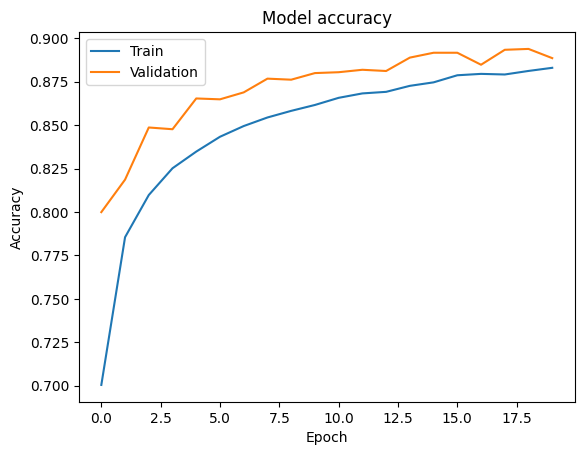

313/313 [==============================] - 1s 3ms/step
tf.Tensor(
[[896   2  12   8   5   1  68   0   8   0]
 [  1 987   0   8   1   0   2   0   1   0]
 [ 18   0 782   7  75   0 113   0   5   0]
 [ 31  10   9 878  40   0  26   0   6   0]
 [  3   1  42  22 860   0  69   0   3   0]
 [  0   0   0   0   0 975   1  15   1   8]
 [168   2  48  23 106   0 639   0  14   0]
 [  0   0   0   0   0  18   0 907   2  73]
 [  3   0   3   3   4   1   4   1 980   1]
 [  0   0   0   0   0   5   0  14   0 981]], shape=(10, 10), dtype=int32)
Validation accuracy: 0.8884999752044678


In [ ]:
# (OPTIONAL) Additional code to demonstrate possible improvements to the model in Part 2.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_valid = X_valid.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


batch_size = 128
epochs = 20

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid)
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_valid, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_true_labels, y_pred_labels)
print(confusion_matrix)


_, accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print('Validation accuracy:', accuracy)
